In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [2]:
cd '/content/drive/My Drive/DIP/Projeto/Replication'

/content/drive/My Drive/DIP/Projeto/Replication


In [3]:
ls

data/                       MNIST_L1_1reps.csv      __pycache__/
data_loader.py              PCANet_alvaro_01.ipynb  requirements.txt
MNIST_L1_1reps_20k_10k.csv  PCANet_alvaro_01.py
MNIST_L1_1reps_30k_10k.csv  PCANet.py


In [4]:
from PCANet import *
from data_loader import *
import sys
from sklearn.metrics import accuracy_score
from sklearn import svm

In [ ]:
train_images, train_labels, test_images, test_labels = load_mnist('data/MNIST')
test_train = (train_images[:10, :, :], train_labels[:10])

In [ ]:
print(train_labels)

[5 0 4 ... 5 6 8]


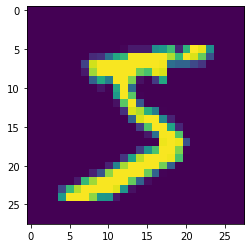

In [ ]:
plt.imshow(train_images[0])

# Teste 2

In [18]:
train_images, train_labels, test_images, test_labels = load_mnist('data/MNIST')
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:5000]
test_labels = test_labels[:5000]
print(train_images.shape)
print(test_images.shape)

(10000, 28, 28)
(5000, 28, 28)


In [20]:
net = PCANet(k1=7, k2=7, L1=6, L2=1, block_size=7, overlapping_radio=0.5)
net.fit(train_images, train_labels)
prediction = net.predict(test_images)
print(accuracy_score(test_labels, prediction))

calculating L1_stage filters
0 th picture
shape of L1_stage filters: (6, 7, 7)
shape of L1 stage convolution results: (60000, 28, 28)
calculating L2_stage filters
0 th picture
10000 th picture
20000 th picture
30000 th picture
40000 th picture
50000 th picture
shape of L2_stage filters: (1, 7, 7)
extracting 0 th feature
extracting 1000 th feature
extracting 2000 th feature
extracting 3000 th feature
extracting 4000 th feature
extracting 5000 th feature
extracting 6000 th feature
extracting 7000 th feature
extracting 8000 th feature
extracting 9000 th feature
length of feature: 768
features extracted, SVM training
predicting 0 th label
predicting 500 th label
predicting 1000 th label
predicting 1500 th label
predicting 2000 th label
predicting 2500 th label
predicting 3000 th label
predicting 3500 th label
predicting 4000 th label
predicting 4500 th label
0.956


# Plotting

   L1    mean  std
0   2  0.9438  0.0
1   4  0.9572  0.0
2   6  0.9568  0.0
3   8  0.9582  0.0
4  10  0.9652  0.0
5  12  0.9620  0.0


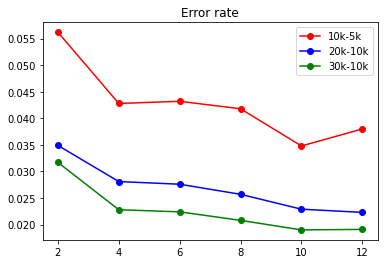

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('MNIST_L1_1reps.csv')
df2 = pd.read_csv ('MNIST_L1_1reps_20k_10k.csv')
df3 = pd.read_csv ('MNIST_L1_1reps_30k_10k.csv')
print(df)

plt.title('Error rate')
plt.plot(df['L1'],1-df['mean'],'ro-',label='10k-5k')
plt.plot(df2['L1'],1-df2['mean'],'bo-',label='20k-10k')
plt.plot(df3['L1'],1-df3['mean'],'go-',label='30k-10k')
plt.legend()